In [1243]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

data = pd.read_csv('data.csv', header=None, names=['x', 'y', 'label'])
points = []
for (idx, x, y, label) in data.itertuples():
    points.append((x, y, label))

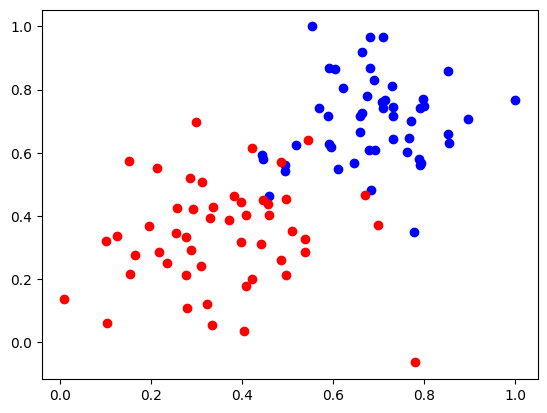

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(data.x[data.label == 0], data.y[data.label == 0], c='b')
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], c='r')

In [ ]:
class HeuristicPerceptron:
    
    def __init__(self, learning_rate=.1, seed=1):
        random.seed(seed)
        self.learning_rate = learning_rate
        self.w1 = random.uniform(-1, 1)*100
        self.w2 = random.uniform(-1, 1)*100
        self.b = random.uniform(-1, 1)*100
        self.error = np.inf
    
    def predict(self, point):
        (x1, x2, _) = point
        guess = np.sign(self.w1 * x1 + self.w2 * x2 + self.b)
        guess = 1 if guess < 0 else 0
        return guess
    
    def gen_slope(self, x_values):
        f = lambda x: ((-1) * (self.w1 * x) / self.w2) + ((-1) * self.b / self.w2)
        return f(x_values)
    
    def train(self, points):
        truth_labels = []
        guess_labels = []
        for point in points:
            prediction = self.predict(point)
            guess_labels.append(prediction)
            (x1, x2, truth) = point
            truth_labels.append(truth)
            if prediction != truth:
                if truth == 0:
                    self.b += self.learning_rate
                    self.w1 += self.learning_rate * x1
                    self.w2 += self.learning_rate * x2
                elif truth == 1:
                    self.b -= self.learning_rate
                    self.w1 -= self.learning_rate * x1
                    self.w2 -= self.learning_rate * x2
        self.error = log_loss(truth_labels, guess_labels)

In [1246]:
class GradientPerceptron:

    def __init__(self, learning_rate=.1, seed=1):
        random.seed(seed)
        self.learning_rate = learning_rate
        self.w1 = random.uniform(-1, 1)*100
        self.w2 = random.uniform(-1, 1)*100
        self.b = random.uniform(-1, 1)*100
    
    def predict(self, point):
        (x1, x2, _) = point
        y_hat = 1 / (1 + np.exp(-1 * (self.w1 * x1 + self.w2 * x2 + self.b)))
        return y_hat
    
    def gen_slope(self, x_values):
        f = lambda x: ((-1) * (self.w1 * x) / self.w2) + ((-1) * self.b / self.w2) 
        return f(x_values)
    
    def train(self, points):
        avg_error = 0
        for point in points:
            prediction = self.predict(point)
            (x1, x2, truth) = point
            error = truth - prediction
            avg_error += abs(error)
            if prediction != truth:
                self.b += self.learning_rate * error
                self.w1 += self.learning_rate * error * x1
                self.w2 += self.learning_rate * error * x2
        self.last_error = avg_error / len(points)

In [ ]:
def heuristic_experiment(learning_rate, iterations, seed=1):
    plt.scatter(data.x[data.label == 0], data.y[data.label == 0], c='black', s=15)
    plt.scatter(data.x[data.label == 1], data.y[data.label == 1], c='black', s=15)
    plt.scatter(data.x[data.label == 0], data.y[data.label == 0], c='b', s=5)
    plt.scatter(data.x[data.label == 1], data.y[data.label == 1], c='r', s=5)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    p = HeuristicPerceptron(learning_rate, seed)

    iter_samples = []
    epoch_errors = []
    x_values = np.linspace(0, 1, iterations)
    initial_slope = p.gen_slope(x_values)

    for i in range(iterations):
        p.train(points)
        if i % (.01 * iterations) == 0:
            iter_samples.append(i)
            epoch_errors.append(p.error)
        if i % (iterations * .03) == 0:
            plt.plot(x_values, p.gen_slope(x_values), c='teal', ls='--', lw=0.7)
    plt.plot(x_values, initial_slope, c='black', lw=5)
    plt.plot(x_values, initial_slope, c='red', lw=2)
    plt.plot(x_values, p.gen_slope(x_values), c='black', lw=5)
    plt.plot(x_values, p.gen_slope(x_values), c='cyan', lw=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Learning rate: ' + str(learning_rate) + ', iterations: ' + str(iterations))

    plt.show()

    plt.plot(iter_samples, epoch_errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Learning rate: ' + str(learning_rate) + ', iterations: ' + str(iterations))
    plt.show()    

In [1248]:
def gradient_experiment(learning_rate, iterations, seed=1):
    plt.scatter(data.x[data.label == 0], data.y[data.label == 0], c='black', s=15)
    plt.scatter(data.x[data.label == 1], data.y[data.label == 1], c='black', s=15)
    plt.scatter(data.x[data.label == 0], data.y[data.label == 0], c='b', s=5)
    plt.scatter(data.x[data.label == 1], data.y[data.label == 1], c='r', s=5)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    p = GradientPerceptron(learning_rate, seed)

    epoch_errors = []
    x_values = np.linspace(0, 1, iterations)
    initial_slope = p.gen_slope(x_values)
    for i in range(iterations):
        p.train(points)
        epoch_errors.append(p.last_error)
        if i % (iterations * .03) == 0:
            plt.plot(x_values, p.gen_slope(x_values), c='teal', ls='--', lw=0.7)
    plt.plot(x_values, initial_slope, c='black', lw=5)
    plt.plot(x_values, initial_slope, c='red', lw=2)
    plt.plot(x_values, p.gen_slope(x_values), c='black', lw=5)
    plt.plot(x_values, p.gen_slope(x_values), c='cyan', lw=2)
    # labels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Learning rate: ' + str(learning_rate) + ', iterations: ' + str(iterations))

    plt.show()
    plt.plot(range(len(epoch_errors)), epoch_errors)
    plt.xlabel('Epochs')
    plt.ylabel('Avg Error')
    plt.title('Learning rate: ' + str(learning_rate) + ', iterations: ' + str(iterations))
    plt.show()  

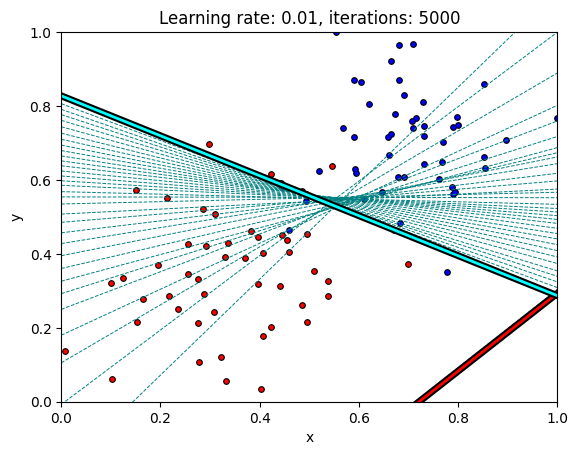

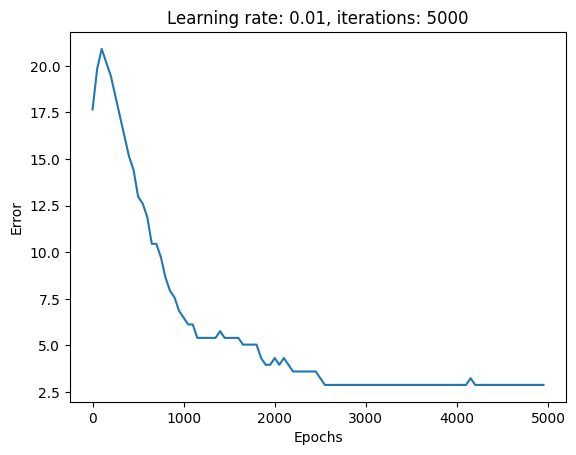

In [1249]:
heuristic_experiment(0.01, 5000)

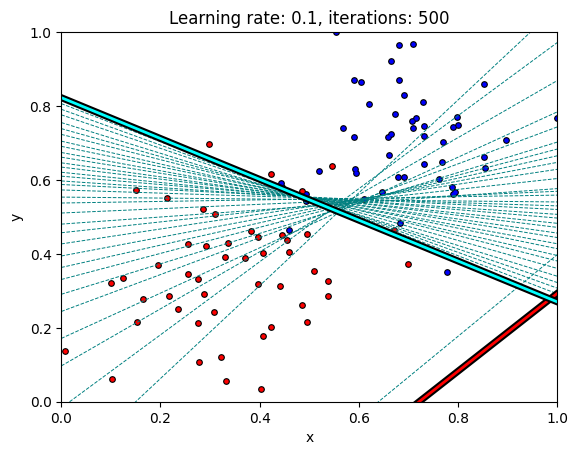

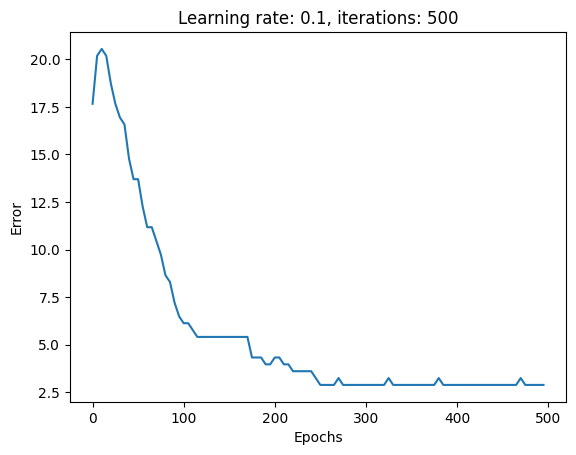

In [1250]:
heuristic_experiment(0.1, 500)

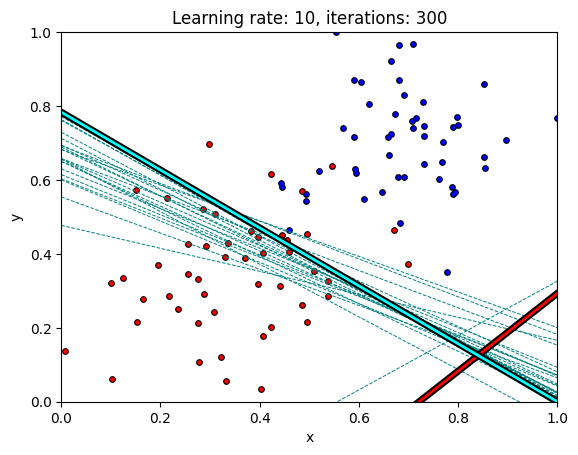

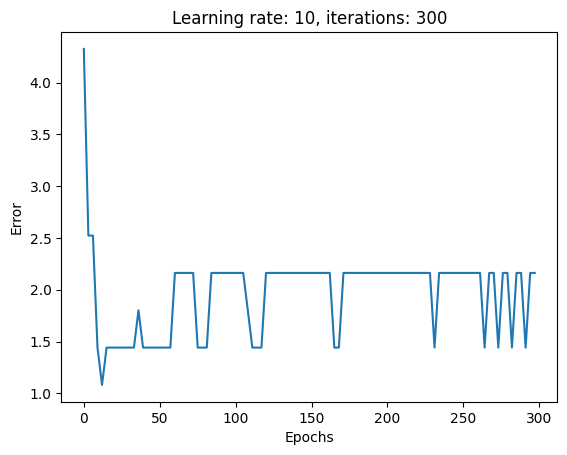

In [1252]:
heuristic_experiment(10, 300)

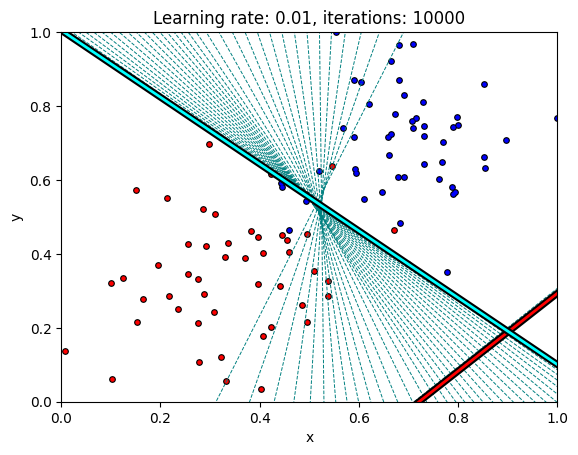

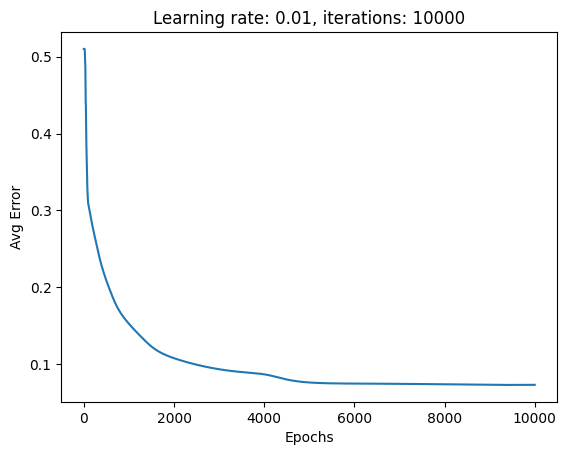

In [1253]:
gradient_experiment(0.01, 10000)

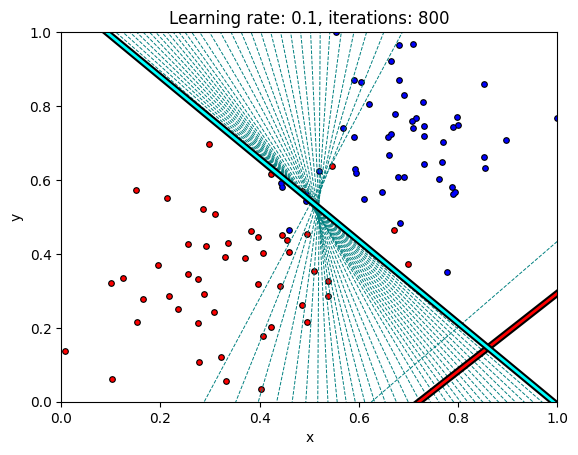

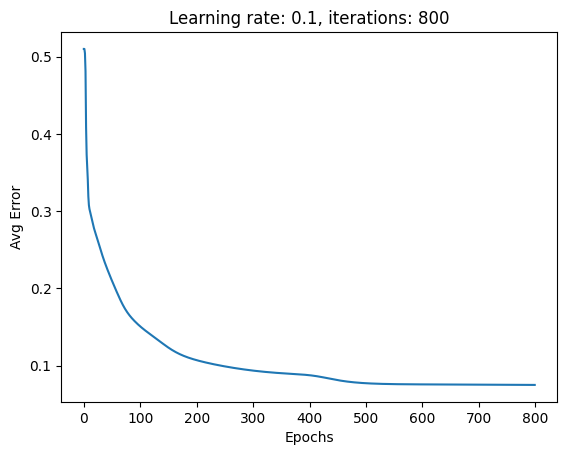

In [1254]:
gradient_experiment(0.1, 800)

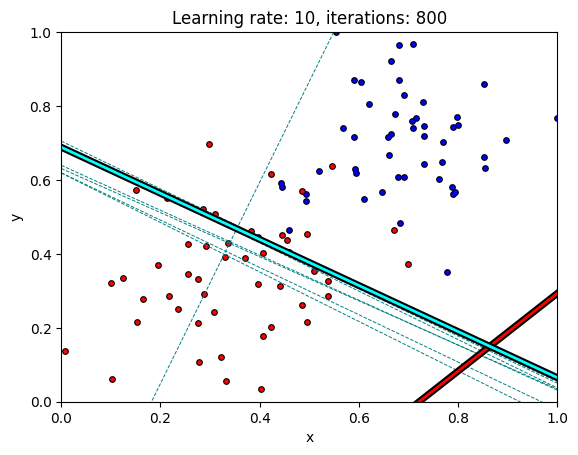

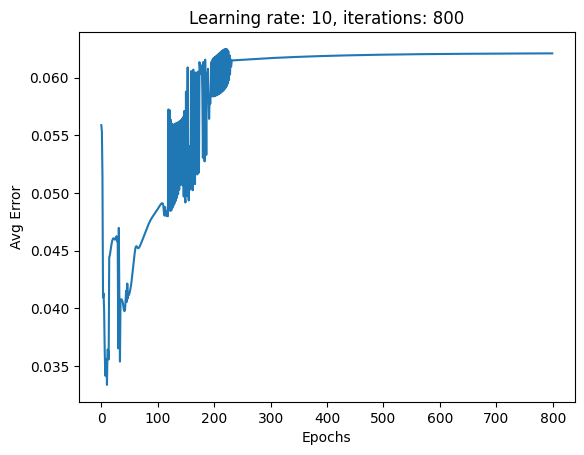

In [1256]:
gradient_experiment(10, 800)